<a href="https://colab.research.google.com/github/stutis28/PythonPractise/blob/master/DataAggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/amazon_fires.csv"
df = pd.read_csv(file_name, encoding = "ISO-8859-1")
new_columns = {'ano' : 'year',
               'estado' : 'state',
               'mes' : 'month',
               'numero' : 'number_of_fires',
               'encontro' : 'date'}
df.rename(columns = new_columns, inplace = True)
df['state'] = df['state'].str.title()

df['number_of_fires'] = df['number_of_fires'].str.strip(' Fires')
df['number_of_fires'] = df['number_of_fires'].fillna(0)
df['number_of_fires'] = df['number_of_fires'].astype("float")

#Introducing Map function
month_translations = {'Janeiro' : 'January',
                      'Fevereiro' : 'February',
                      'Marco' : 'March',
                      'Abril' : 'April',
                      'Maio' : 'May',
                      'Junho' : 'June',
                      'Julho' : 'July',
                      'Agosto' : 'August',
                      'Setembro' : 'September',
                      'Novembro' : 'November',
                      'Dezembro' : 'December'}

df['month'] = df['month'].map(month_translations)
df.head(15)

,year,month,state,number_of_fires,date
0,1998,January,Acre,0.0,1/1/1998
1,1999,January,Acre,0.0,1/1/1999
2,2000,January,Acre,0.0,1/1/2000
3,2001,January,Acre,0.0,1/1/2001
4,2002,January,Acre,0.0,1/1/2002
5,2003,January,Acre,10.0,1/1/2003
6,2004,January,Acre,0.0,1/1/2004
7,2005,January,Acre,12.0,1/1/2005
8,2006,January,Acre,4.0,1/1/2006
9,2007,January,Acre,0.0,1/1/2007


In [0]:
df.groupby('state')

In [0]:
state_group = df.groupby('state')

In [0]:
state_group.get_group('Rio')

,year,month,state,number_of_fires,date
4303,1998,January,Rio,0.0,1/1/1998
4304,1999,January,Rio,0.0,1/1/1999
4305,2000,January,Rio,0.0,1/1/2000
4306,2001,January,Rio,0.0,1/1/2001
4307,2002,January,Rio,0.0,1/1/2002
...,...,...,...,...,...
5015,2012,December,Rio,38.0,1/1/2012
5016,2013,December,Rio,62.0,1/1/2013
5017,2014,December,Rio,31.0,1/1/2014
5018,2015,December,Rio,42.0,1/1/2015


In [0]:
state_group.groups

In [0]:
state_group.size()

state
Acre                239
Alagoas             240
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      239
Goias               239
Maranhao            239
Mato Grosso         478
Minas Gerais        239
Paraiba             478
Pará                239
Pernambuco          239
Piau                239
Rio                 717
Rondonia            239
Roraima             239
Santa Catarina      239
Sao Paulo           239
Sergipe             239
Tocantins           239
dtype: int64

In [0]:
state_group.mean()

In [0]:
df.groupby('state')['number_of_fires'].mean()

state
Acre                 75.192594
Alagoas              19.141667
Amapa                84.136301
Amazonas            125.063301
Bahia               181.639962
Ceara               127.175908
Distrito Federal     14.648536
Espirito Santo      154.821238
Goias                97.752519
Maranhao            103.929577
Mato Grosso         199.930910
Minas Gerais        154.821238
Paraiba             108.209033
Pará                 92.569640
Pernambuco           96.062762
Piau                157.082222
Rio                  62.482378
Rondonia             80.499703
Roraima              99.368510
Santa Catarina       97.752519
Sao Paulo           208.737230
Sergipe              13.251046
Tocantins           139.922632
Name: number_of_fires, dtype: float64

In [0]:
import numpy as np
df.pivot_table(values = 'number_of_fires',index = 'state',aggfunc = np.mean)

,number_of_fires
state,
Acre,75.192594
Alagoas,19.141667
Amapa,84.136301
Amazonas,125.063301
Bahia,181.639962
Ceara,127.175908
Distrito Federal,14.648536
Espirito Santo,154.821238
Goias,97.752519


In [0]:
df.pivot_table(values = 'number_of_fires', index = 'state', aggfunc= np.mean, margins= True)

,number_of_fires
state,
Acre,75.192594
Alagoas,19.141667
Amapa,84.136301
Amazonas,125.063301
Bahia,181.639962
Ceara,127.175908
Distrito Federal,14.648536
Espirito Santo,154.821238
Goias,97.752519


In [0]:
fires_per_state = df.pivot_table(values = 'number_of_fires', index = 'state', aggfunc=np.mean,margins = True)

max_val = fires_per_state['number_of_fires'].max()
max_val

208.73723012552304

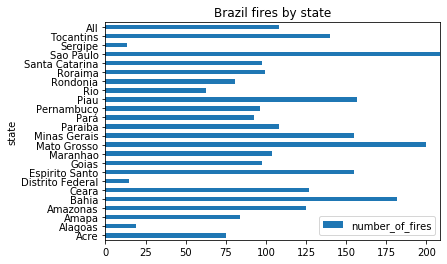

In [0]:
fires_per_state.plot(kind = 'barh', title = 'Brazil fires by state', xlim = (0,max_val), legend = True)

In [0]:
df['severity'] = np.random.randint(1,5, df.shape[0])
df.head(10)

,year,month,state,number_of_fires,date,severity
0,1998,January,Acre,0.0,1/1/1998,1
1,1999,January,Acre,0.0,1/1/1999,2
2,2000,January,Acre,0.0,1/1/2000,4
3,2001,January,Acre,0.0,1/1/2001,2
4,2002,January,Acre,0.0,1/1/2002,3
5,2003,January,Acre,10.0,1/1/2003,3
6,2004,January,Acre,0.0,1/1/2004,2
7,2005,January,Acre,12.0,1/1/2005,1
8,2006,January,Acre,4.0,1/1/2006,4
9,2007,January,Acre,0.0,1/1/2007,2


In [0]:
df.pivot_table(['number_of_fires', 'severity'], index = 'state')

,number_of_fires,severity
state,,
Acre,75.192594,2.405858
Alagoas,19.141667,2.466667
Amapa,84.136301,2.481172
Amazonas,125.063301,2.552301
Bahia,181.639962,2.585774
Ceara,127.175908,2.309623
Distrito Federal,14.648536,2.510460
Espirito Santo,154.821238,2.451883
Goias,97.752519,2.581590


In [0]:
df.pivot_table(values = ['number_of_fires','severity'], index ='state', aggfunc = [np.mean, np.min, np.max], margins = True)

mean            ...            amax         
                 number_of_fires  severity  ... number_of_fires severity
state                                       ...                         
Acre                   75.192594  2.405858  ...           960.0        4
Alagoas                19.141667  2.466667  ...           162.0        4
Amapa                  84.136301  2.481172  ...           969.0        4
Amazonas              125.063301  2.552301  ...           998.0        4
Bahia                 181.639962  2.585774  ...           995.0        4
Ceara                 127.175908  2.309623  ...           995.0        4
Distrito Federal       14.648536  2.510460  ...           196.0        4
Espirito Santo        154.821238  2.451883  ...           959.0        4
Goias                  97.752519  2.581590  ...           759.0        4
Maranhao              103.929577  2.552301  ...           972.0        4
Mato Grosso           199.930910  2.512552  ...           979.0        4
Minas Gerais          154.821238  2.456067  ...           959.0        4
Paraiba               108.209033  2.596234  ...           987.0        4
Pará                   92.569640  2.493724  ...           971.0        4
Pernambuco             96.062762  2.510460  ...           859.0        4
Piau                  157.082222  2.535565  ...           943.0        4
Rio                    62.482378  2.463040  ...           885.0        4
Rondonia               80.499703  2.384937  ...           969.0        4
Roraima                99.368510  2.460251  ...           820.0        4
Santa Catarina         97.752519  2.531381  ...           759.0        4
Sao Paulo             208.737230  2.443515  ...           981.0        4
Sergipe                13.251046  2.456067  ...           198.0        4
Tocantins             139.922632  2.359833  ...           989.0        4
All                   108.404542  2.486520  ...           998.0        4

[24 rows x 6 columns]

In [0]:
df.groupby('state')['number_of_fires','severity'].agg([np.mean,np.max])

number_of_fires         severity     
                            mean   amax      mean amax
state                                                 
Acre                   75.192594  960.0  2.405858    4
Alagoas                19.141667  162.0  2.466667    4
Amapa                  84.136301  969.0  2.481172    4
Amazonas              125.063301  998.0  2.552301    4
Bahia                 181.639962  995.0  2.585774    4
Ceara                 127.175908  995.0  2.309623    4
Distrito Federal       14.648536  196.0  2.510460    4
Espirito Santo        154.821238  959.0  2.451883    4
Goias                  97.752519  759.0  2.581590    4
Maranhao              103.929577  972.0  2.552301    4
Mato Grosso           199.930910  979.0  2.512552    4
Minas Gerais          154.821238  959.0  2.456067    4
Paraiba               108.209033  987.0  2.596234    4
Pará                   92.569640  971.0  2.493724    4
Pernambuco             96.062762  859.0  2.510460    4
Piau                  157.082222  943.0  2.535565    4
Rio                    62.482378  885.0  2.463040    4
Rondonia               80.499703  969.0  2.384937    4
Roraima                99.368510  820.0  2.460251    4
Santa Catarina         97.752519  759.0  2.531381    4
Sao Paulo             208.737230  981.0  2.443515    4
Sergipe                13.251046  198.0  2.456067    4
Tocantins             139.922632  989.0  2.359833    4

In [0]:
def max_minus_mean(grouped_data):
  return (grouped_data.max() - grouped_data.mean())

df.groupby('state')['number_of_fires'].agg(max_minus_mean)

state
Acre                884.807406
Alagoas             142.858333
Amapa               884.863699
Amazonas            872.936699
Bahia               813.360038
Ceara               867.824092
Distrito Federal    181.351464
Espirito Santo      804.178762
Goias               661.247481
Maranhao            868.070423
Mato Grosso         779.069090
Minas Gerais        804.178762
Paraiba             878.790967
Pará                878.430360
Pernambuco          762.937238
Piau                785.917778
Rio                 822.517622
Rondonia            888.500297
Roraima             720.631490
Santa Catarina      661.247481
Sao Paulo           772.262770
Sergipe             184.748954
Tocantins           849.077368
Name: number_of_fires, dtype: float64

In [0]:
pd.DataFrame(df.groupby('state')['number_of_fires'].agg(max_minus_mean)).reset_index()

,state,number_of_fires
0,Acre,884.807406
1,Alagoas,142.858333
2,Amapa,884.863699
3,Amazonas,872.936699
4,Bahia,813.360038
5,Ceara,867.824092
6,Distrito Federal,181.351464
7,Espirito Santo,804.178762
8,Goias,661.247481
9,Maranhao,868.070423
